<a target="_blank" href="https://colab.research.google.com/github/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

[View source code](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn.ipynb) | [Read notebook in online book format](https://dev.mrdbourke.com/zero-to-mastery-ml/introduction-to-scikit-learn/)


# A Quick Machine Learning Modelling Tutorial with Python and Scikit-Learn

This notebook goes through a range of common and useful featues of the Scikit-Learn library.

There's a bunch here but I'm calling it quick because of how vast the Scikit-Learn library is. 

Covering everything requires a [full-blown documentation](https://scikit-learn.org/stable/user_guide.html), of which, if you ever get stuck, I'd highly recommend checking out.

## What is Scikit-Learn (sklearn)?

[Scikit-Learn](https://scikit-learn.org/stable/index.html), also referred to as `sklearn`, is an open-source Python machine learning library.

It's built on top on NumPy (Python library for numerical computing) and Matplotlib (Python library for data visualization).

<img src="ml 6 steps framework and tools.png" alt="a 6 step machine learning framework along will tools you can use for each step" width="700"/>

## Why Scikit-Learn?

Although the fields of data science and machine learning are vast, the main goal is finding patterns within data and then using those patterns to make predictions.

And there are certain categories which a majority of problems fall into.

If you're trying to create a machine learning model to predict whether an email is spam and or not spam, you're working on a [classification problem](https://en.wikipedia.org/wiki/Statistical_classification#Binary_and_multiclass_classification) (whether something is one thing or another).

If you're trying to create a machine learning model to predict the price of houses given their characteristics, you're working on a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) (predicting a number).

If you're trying to get a machine learning algorithm to group together similar samples (that you don't necessarily know which should go together), you're working on a [clustering problem](https://developers.google.com/machine-learning/clustering/overview).

Once you know what kind of problem you're working on, there are also similar steps you'll take for each. Steps like splitting the data into different sets, one for your machine learning algorithms to learn on (the training set) and another to test them on (the testing set).

Choosing a machine learning model and then evaluating whether or not your model has learned anything.

Scikit-Learn offers Python implementations for doing all of these kinds of tasks (from preparing data to modelling data). Saving you from having to build them from scratch.

## What does this notebook cover?

The Scikit-Learn library is very capable. However, learning everything off by heart isn't necessary. Instead, this notebook focuses some of the main use cases of the library.

More specifically, we'll cover:

<img src="ml101-6-step-ml-framework.png" alt="a 6 step scikit-learn workflow"/>

0. An end-to-end Scikit-Learn worfklow
1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model
7. Putting it all together in a pipeline

> **Note:** All of the steps in this notebook are focused on [**supervised learning**](https://en.wikipedia.org/wiki/Supervised_learning) (having data and labels). The other side of supervised learning is [**unsupervised learning**](https://en.wikipedia.org/wiki/Unsupervised_learning) (having data but no labels). 

After going through it, you'll have the base knolwedge of Scikit-Learn you need to keep moving forward.

## Where can I get help?

If you get stuck or think of something you'd like to do which this notebook doesn't cover, don't fear!

The recommended steps you take are:
1. **Try it** - Since Scikit-Learn has been designed with usability in mind, your first step should be to use what you know and try figure out the answer to your own question (getting it wrong is part of the process). If in doubt, run your code.
2. **Press SHIFT+TAB** - See you can the docstring of a function (information on what the function does) by pressing **SHIFT + TAB** inside it. Doing this is a good habit to develop. It'll improve your research skills and give you a better understanding of the library. 
3. **Search for it** - If trying it on your own doesn't work, since someone else has probably tried to do something similar, try searching for your problem. You'll likely end up in 1 of 2 places:
    * [Scikit-Learn documentation/user guide](https://scikit-learn.org/stable/user_guide.html) - the most extensive resource you'll find for Scikit-Learn information.
    * [Stack Overflow](https://stackoverflow.com/) - this is the developers Q&A hub, it's full of questions and answers of different problems across a wide range of software development topics and chances are, there's one related to your problem.
    * [ChatGPT](https://chat.openai.com/) - ChatGPT is very good at explaining code, however, it can make mistakes. Best to verify the code it writes first before using it. Try asking "Can you explain the following code for me? {your code here}" and then continue with follow up questions from there.
    
An example of searching for a Scikit-Learn solution might be:

> "how to tune the hyperparameters of a sklearn model"

Searching this on Google leads to the Scikit-Learn documentation for the `GridSearchCV` function: http://scikit-learn.org/stable/modules/grid_search.html

The next steps here are to read through the documentation, check the examples and see if they line up to the problem you're trying to solve. If they do, **rewrite the code** to suit your needs, run it, and see what the outcomes are.

Remember, you don't have to learn all of the functions off by heart to begin with. 

What's most important is continually asking yourself, "what am I trying to do with the data?".

Start by answering that question and then practicing finding the code which does it.

Let's get started.

First we'll import the libraries we've been using previously.

We'll also check the version of `sklearn` we've got.

# introduction to Scikit-learn (sklearn)

This notebook demonstrates some of the most useful functions of beautiful Scikit-learn lib.

what we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Chooste the right estimator / algorithm for our problems
3. Fit the model/algorithm and use it to make preseictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

# 0. An end-to-end Scikit-learn workflow

In [1]:
#1. Get the data ready
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_disease.shape

(303, 14)

In [4]:
heart_disease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
over_50 = heart_disease[heart_disease['age']>50]

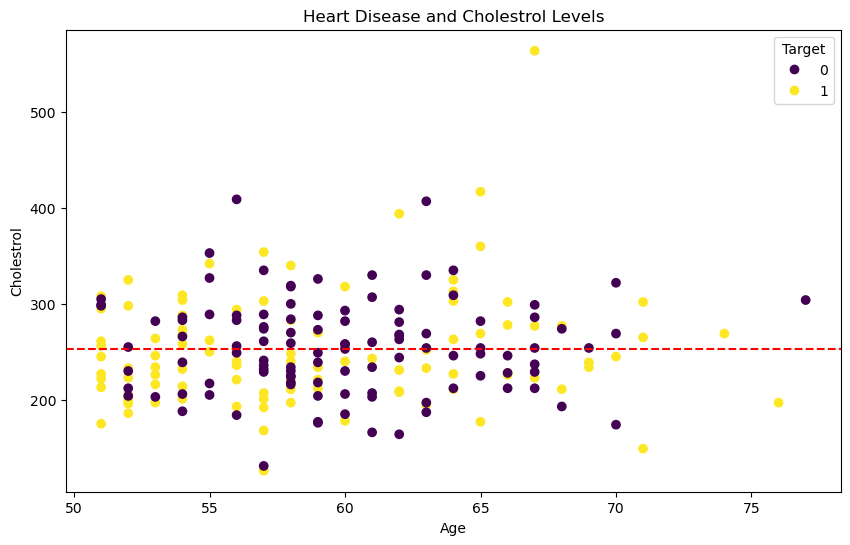

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

#Plot the data
scatter = ax.scatter(x=over_50['age'],
                     y=over_50['chol'],
                     c=over_50['target'])
ax.set(title="Heart Disease and Cholestrol Levels",
                     xlabel= "Age",
                     ylabel= "Cholestrol")

ax.legend(*scatter.legend_elements(), title="Target")

ax.axhline(over_50["chol"].mean(), linestyle="--", c='r');

In [10]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
#Create X (features matrix)
X = heart_disease.drop("target",axis=1)

#Create y(labels matrix)
y= heart_disease['target']

In [12]:
#2. Choose the model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [13]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_preds= clf.predict(X_test)
y_preds

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [16]:
y_test

137    1
52     1
187    0
192    0
41     1
      ..
84     1
219    0
259    0
148    1
189    0
Name: target, Length: 61, dtype: int64

In [17]:
clf.score(X_train, y_train)

1.0

In [18]:
clf.score(X_test, y_test)

0.8032786885245902

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        35
           1       0.72      0.88      0.79        26

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [21]:
confusion_matrix(y_test,y_preds)

array([[26,  9],
       [ 3, 23]], dtype=int64)

In [22]:
np.random.seed(42)
for i in range(10,101,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:2f}%")
    print(' ')

Trying model with 10 estimators...
Model accuracy on test set: 70.491803%
 
Trying model with 20 estimators...
Model accuracy on test set: 78.688525%
 
Trying model with 30 estimators...
Model accuracy on test set: 77.049180%
 
Trying model with 40 estimators...
Model accuracy on test set: 78.688525%
 
Trying model with 50 estimators...
Model accuracy on test set: 83.606557%
 
Trying model with 60 estimators...
Model accuracy on test set: 81.967213%
 
Trying model with 70 estimators...
Model accuracy on test set: 81.967213%
 
Trying model with 80 estimators...
Model accuracy on test set: 81.967213%
 
Trying model with 90 estimators...
Model accuracy on test set: 78.688525%
 
Trying model with 100 estimators...
Model accuracy on test set: 80.327869%
 


In [23]:
clf=RandomForestClassifier(n_estimators=50).fit(X_train,y_train)

In [27]:
clf.score(X_test,y_test)

0.7868852459016393

In [30]:
import pickle 

pickle.dump(clf, open("random_forest_model_50.pkl","wb"))

In [31]:
loaded_model = pickle.load(open('random_forest_model_50.pkl',"rb"))
loaded_model.score(X_test,y_test)

0.7868852459016393